## LABOUR FORCE PARTICIPATION RATE

### Background of the Dataset

This dataset provides a detailed perspective on global labour force participation, with a particular emphasis on the gender disparities in employment across different countries, continents, and hemispheres. It includes data on both male and female participation rates across multiple years, allowing for the exploration of long-term trends in workforce engagement, gender equality, and regional labour dynamics.

Additionally, the inclusion of the Human Development Index (HDI) rankings for 2021 offers insight into how socio-economic development correlates with labour participation. The dataset’s geographic dimensions—continent and hemisphere—allow for broader regional comparisons and help uncover global socio-economic patterns and inequalities.

### Relevance to Sustainable Development Goals (SDGs)

This dataset is highly relevant to the United Nations Sustainable Development Goal 5: Gender Equality, which aims to ensure equal opportunities for all, including in the economic and labour sectors. Specifically, the dataset can be used to assess progress toward:

SDG Target 5.5: Ensure women's full and effective participation and equal opportunities for leadership at all levels of decision-making in political, economic, and public life.

It also aligns with SDG Goal 8: Decent Work and Economic Growth, particularly:

SDG Target 8.5: By 2030, achieve full and productive employment and decent work for all women and men, including for young people and persons with disabilities, and equal pay for work of equal value.

### Source
This dataset was sourced from Kaggle, a widely used platform in the data science and machine learning community, offering access to a broad range of public datasets for analysis, education, and model development.

### Objectives to Address
 
- Measure gender disparities in labour force participation across countries.
- Classify countries into tiers based on participation equality metrics.
- Monitor the impact of development (via HDI) on workforce participation over time. 
- Compare labour force participation between high and low HDI-ranked countries.
- Determine correlation between HDI ranking and gender parity in participation.
- Analyze average participation levels for both genders across regions.
- Detect and summarize regional trends in labour inclusion inequality.
- Highlight countries with extreme gender imbalance in workforce inclusion. 
- Identify countries with the highest and lowest gender participation gaps. 
- Prepare summary statistics on total participation by gender and geography. 

In [4]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [6]:
# loading the dataset

# Load each CSV file
female = pd.read_csv('Labour Force Participation Rate - Female.csv')
male = pd.read_csv('Labour Force Participation Rate - Male.csv')

# Rename columns (only year columns) for clarity
years = range(1990, 2022)

female_renamed = female.rename(columns={f"Labour force participation rate, female (% ages 15 and older) ({y})": f"Female_{y}" for y in years})
male_renamed = male.rename(columns={f"Labour force participation rate, male (% ages 15 and older) ({y})": f"Male_{y}" for y in years})


# Select only needed columns
female_base = female_renamed[['Country', 'ISO3', 'Continent', 'Hemisphere', 'HDI Rank (2021)'] + [f"Female_{y}" for y in years]]
male_base = male_renamed[['Country', 'ISO3'] + [f"Male_{y}" for y in years]]


### Displaying the various datasets as one

In [8]:
# Merge on Country and ISO3
labour_force = pd.merge(female_base, male_base, on=['Country', 'ISO3'], how='outer')
labour_force.head()

,Country,ISO3,Continent,Hemisphere,HDI Rank (2021),Female_1990,Female_1991,Female_1992,Female_1993,Female_1994,...,Male_2012,Male_2013,Male_2014,Male_2015,Male_2016,Male_2017,Male_2018,Male_2019,Male_2020,Male_2021
0,Afghanistan,AFG,Asia,Northern Hemisphere,180.0,15.180,15.214,15.223,15.197,15.178,...,76.420,75.588,74.737,73.875,73.045,72.183,72.023,71.863,65.580,66.515
1,Albania,ALB,Europe,Northern Hemisphere,67.0,51.364,54.727,55.608,54.638,53.825,...,65.197,61.180,62.984,63.957,64.800,66.440,67.247,67.742,65.631,66.154
2,Algeria,DZA,Africa,Northern Hemisphere,91.0,10.923,11.042,11.163,11.313,11.475,...,67.900,69.510,66.397,66.832,66.510,66.574,66.626,66.726,64.023,64.480
3,Andorra,AND,Europe,Northern Hemisphere,40.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,AGO,Africa,Southern Hemisphere,148.0,75.408,75.381,75.369,75.371,75.387,...,79.922,79.930,79.912,79.865,79.827,79.756,79.653,79.519,78.798,79.071


In [9]:
labour_force.shape

(195, 69)

### Reshaping the Dataset

In [11]:
# Reshape to long format with 'Year', 'Male_Participation', 'Female_Participation'
labour_force1 = pd.DataFrame()

for year in years:
    temp = labour_force[['Country', 'ISO3', 'Continent', 'Hemisphere', 'HDI Rank (2021)', f'Male_{year}', f'Female_{year}']].copy()
    temp['Year'] = year
    temp.rename(columns={
        f'Male_{year}': 'Male_Participation',
        f'Female_{year}': 'Female_Participation'
    }, inplace=True)
    labour_force1 = pd.concat([labour_force1, temp], ignore_index=True)


In [12]:
# Create a new column: Gender Gap = Male_Participation - Female_Participation
labour_force1['Gender_Gap'] = labour_force1['Male_Participation'] - labour_force1['Female_Participation']

In [13]:
labour_force1.head()


,Country,ISO3,Continent,Hemisphere,HDI Rank (2021),Male_Participation,Female_Participation,Year,Gender_Gap
0,Afghanistan,AFG,Asia,Northern Hemisphere,180.0,77.430,15.180,1990,62.250
1,Albania,ALB,Europe,Northern Hemisphere,67.0,72.510,51.364,1990,21.146
2,Algeria,DZA,Africa,Northern Hemisphere,91.0,76.461,10.923,1990,65.538
3,Andorra,AND,Europe,Northern Hemisphere,40.0,NaN,NaN,1990,NaN
4,Angola,AGO,Africa,Southern Hemisphere,148.0,79.292,75.408,1990,3.884


In [14]:
labour_force1.tail()

,Country,ISO3,Continent,Hemisphere,HDI Rank (2021),Male_Participation,Female_Participation,Year,Gender_Gap
6235,Venezuela,VEN,America,Northern Hemisphere,120.0,67.813,34.348,2021,33.465
6236,Viet Nam,VNM,Asia,Northern Hemisphere,115.0,79.437,69.637,2021,9.800
6237,Yemen,YEM,Asia,Northern Hemisphere,183.0,67.637,5.995,2021,61.642
6238,Zambia,ZMB,Africa,Southern Hemisphere,154.0,77.847,69.230,2021,8.617
6239,Zimbabwe,ZWE,Africa,Southern Hemisphere,146.0,88.933,79.308,2021,9.625


In [15]:
labour_force1.dtypes

Country                  object
ISO3                     object
Continent                object
Hemisphere               object
HDI Rank (2021)         float64
Male_Participation      float64
Female_Participation    float64
Year                      int64
Gender_Gap              float64
dtype: object

## Data Cleaning

In [17]:
labour_force1[labour_force1.duplicated()]

,Country,ISO3,Continent,Hemisphere,HDI Rank (2021),Male_Participation,Female_Participation,Year,Gender_Gap


In [18]:
# Checking the number of duplicates in our dataset
labour_force1.duplicated().sum()

0

In [19]:
labour_force1.shape

(6240, 9)

- **This dataset now contains 6,240 rows and 9 columns**

In [21]:
labour_force1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6240 entries, 0 to 6239
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               6240 non-null   object 
 1   ISO3                  6240 non-null   object 
 2   Continent             6240 non-null   object 
 3   Hemisphere            6240 non-null   object 
 4   HDI Rank (2021)       6112 non-null   float64
 5   Male_Participation    5760 non-null   float64
 6   Female_Participation  5760 non-null   float64
 7   Year                  6240 non-null   int64  
 8   Gender_Gap            5760 non-null   float64
dtypes: float64(4), int64(1), object(4)
memory usage: 438.9+ KB


In [22]:
#checking for null values
labour_force1.isnull().sum()

Country                   0
ISO3                      0
Continent                 0
Hemisphere                0
HDI Rank (2021)         128
Male_Participation      480
Female_Participation    480
Year                      0
Gender_Gap              480
dtype: int64

- **The HDI Rank(2021) cloumn had 128 nulls and the Gender Gap, the Male and Female Participation Columns had 480 nulls each**

In [24]:
# Fill HDI Rank nulls with the column's mean
labour_force1['HDI Rank (2021)'].fillna(labour_force1['HDI Rank (2021)'].mean(), inplace=True)

# Fill participation rates with mean or median
labour_force1['Male_Participation'].fillna(labour_force1['Male_Participation'].mean(), inplace=True)
labour_force1['Female_Participation'].fillna(labour_force1['Female_Participation'].mean(), inplace=True)
labour_force1['Gender_Gap'].fillna(labour_force1['Gender_Gap'].mean(), inplace=True)


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\4135707129.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  labour_force1['HDI Rank (2021)'].fillna(labour_force1['HDI Rank (2021)'].mean(), inplace=True)
C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\4135707129.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [25]:
labour_force1.isnull().sum()

Country                 0
ISO3                    0
Continent               0
Hemisphere              0
HDI Rank (2021)         0
Male_Participation      0
Female_Participation    0
Year                    0
Gender_Gap              0
dtype: int64

- **The nulls in the dataset has been replaced with the mean values**

In [27]:
labour_force1.to_csv('labour_forceUpdated.csv', index=False)


In [28]:
# Calling out the data types
labour_force1.dtypes

Country                  object
ISO3                     object
Continent                object
Hemisphere               object
HDI Rank (2021)         float64
Male_Participation      float64
Female_Participation    float64
Year                      int64
Gender_Gap              float64
dtype: object

In [29]:
# Changing the data types of the column Continent and Hemisphere
labour_force1["Continent"] = labour_force1["Continent"].astype("category")
labour_force1["Hemisphere"] = labour_force1["Hemisphere"].astype("category")
labour_force1["Year"] = labour_force1["Year"].astype("category")

In [30]:
# Create a new column for total participation
labour_force1["Total_Participation"] = labour_force1["Male_Participation"] + labour_force1["Female_Participation"]


In [31]:
# Recalling out the data types
labour_force1.dtypes

Country                   object
ISO3                      object
Continent               category
Hemisphere              category
HDI Rank (2021)          float64
Male_Participation       float64
Female_Participation     float64
Year                    category
Gender_Gap               float64
Total_Participation      float64
dtype: object

## EXPLORATORY DATA ANALYSIS

In [33]:
# summary statistics 
labour_force1.describe()

,HDI Rank (2021),Male_Participation,Female_Participation,Gender_Gap,Total_Participation
count,6240.000000,6240.000000,6240.000000,6240.000000,6240.000000
mean,95.811518,72.988529,50.286516,22.702013,123.275045
std,54.598036,8.787019,16.046557,14.765272,21.246037
min,1.000000,40.590000,5.995000,-6.721000,61.365000
25%,49.000000,67.459750,42.233250,12.021500,111.517000
50%,95.811518,72.988529,50.286516,20.331500,123.275045
75%,143.000000,79.056250,59.791250,29.382500,134.897000
max,191.000000,96.196000,90.555000,73.033000,180.620000


In [34]:
# Checking unique items in the Continent column
labour_force1["Continent"].unique()

['Asia', 'Europe', 'Africa', 'America', 'Oceania']
Categories (5, object): ['Africa', 'America', 'Asia', 'Europe', 'Oceania']

- **The Continent column has 5 distinct items**

In [36]:
# Checking unique items in the Hemisphere column
labour_force1["Hemisphere"].unique()

['Northern Hemisphere', 'Southern Hemisphere']
Categories (2, object): ['Northern Hemisphere', 'Southern Hemisphere']

- **The Hemisphere column has 2 distinct items**

#### Counting the values of each category for the various columns ####

In [39]:
# Counting the values of each category in the Continent Column
labour_force1["Continent"].value_counts().to_frame()

,count
Continent,
Africa,1728
Asia,1568
Europe,1376
America,1120
Oceania,448


In [40]:
# Counting the values of each category in the Continent Column
labour_force1["Hemisphere"].value_counts().to_frame()

,count
Hemisphere,
Northern Hemisphere,4992
Southern Hemisphere,1248


#### Grouping by categories 
- **Group Year by all Participation**
- **Group Hemisphere by all Participation**
- **Group Continent by all Participation**
- **Group Country by all Participation**
- **Group Year by the Gender Gap**
- **Group Hemisphere by the Gender Gap**
- **Group Continent by the Gender Gap**
- **Group Country by the Gender Gap**


In [42]:
# Group by Continent and sum Male, Female, and Total Participation
Participation_by_Year = labour_force1.groupby("Year", observed=True)[
    ["HDI Rank (2021)","Male_Participation", "Female_Participation", "Total_Participation"]
].sum().reset_index()

# Display the result
Participation_by_Year

,Year,HDI Rank (2021),Male_Participation,Female_Participation,Total_Participation
0,1990,18683.246073,14726.07794,9545.99474,24272.07268
1,1991,18683.246073,14714.90794,9576.13674,24291.04468
2,1992,18683.246073,14688.38194,9604.50874,24292.89068
3,1993,18683.246073,14652.95994,9614.74874,24267.70868
4,1994,18683.246073,14623.61094,9653.34274,24276.95368
5,1995,18683.246073,14587.02694,9673.90274,24260.92968
6,1996,18683.246073,14545.96894,9681.28574,24227.25468
7,1997,18683.246073,14514.89694,9705.60474,24220.50168
8,1998,18683.246073,14492.67694,9739.60974,24232.28668
9,1999,18683.246073,14454.32694,9767.48574,24221.81268


- **This code helps analyze yearly trends in global labour force participation, making it easier to track:**

- The overall growth or decline in participation over time

- Gender-based patterns

- Socio-economic development trends over the years

In [44]:
# Group by Continent and sum Male, Female, and Total Participation
Participation_by_Hemisphere = labour_force1.groupby("Hemisphere", observed=True)[
    ["HDI Rank (2021)","Male_Participation", "Female_Participation", "Total_Participation"]
].sum().reset_index()

# Display the result
Participation_by_Hemisphere

,Hemisphere,HDI Rank (2021),Male_Participation,Female_Participation,Total_Participation
0,Northern Hemisphere,450477.905759,361994.975267,241266.898133,603261.87340
1,Southern Hemisphere,147385.968586,93453.447817,72520.961533,165974.40935


- **This provides a hemisphere-level overview of labour force participation and development, helping to analyze how labour dynamics and gender gaps differ between the Northern and Southern Hemispheres.**

In [46]:
# Group by Continent and sum Male, Female, and Total Participation
Participation_by_Continent = labour_force1.groupby("Continent", observed=True)[
    ["HDI Rank (2021)","Male_Participation", "Female_Participation", "Total_Participation"]
].sum().reset_index()

# Display the result
Participation_by_Continent

,Continent,HDI Rank (2021),Male_Participation,Female_Participation,Total_Participation
0,Africa,262777.968586,126915.679939,95641.096511,222556.77645
1,America,98144.000000,85259.670756,55522.718044,140782.38880
2,Asia,140057.968586,119100.914000,69892.330000,188993.24400
3,Europe,49625.968586,91831.999756,69254.617044,161086.61680
4,Oceania,47257.968586,32340.158633,23477.098067,55817.25670


- **This creates a continent-level summary of labour force participation and human development indicators, allowing for macro-level analysis of global workforce inequality and regional disparities in development and gender participation.**

In [48]:
# Group by Continent and sum Male, Female, and Total Participation
Participation_by_Country = labour_force1.groupby("Country", observed=True)[
    ["HDI Rank (2021)","Male_Participation", "Female_Participation", "Total_Participation"]
].sum().reset_index()

# Display the result
Participation_by_Country

,Country,HDI Rank (2021),Male_Participation,Female_Participation,Total_Participation
0,Afghanistan,5760.0,2406.468000,517.398000,2923.86600
1,Albania,2144.0,2188.626000,1589.135000,3777.76100
2,Algeria,2912.0,2285.665000,438.281000,2723.94600
3,Andorra,1280.0,2335.632939,1609.168511,3944.80145
4,Angola,4736.0,2537.947000,2407.242000,4945.18900
...,...,...,...,...,...
190,Venezuela,3840.0,2491.383000,1509.191000,4000.57400
191,Viet Nam,3680.0,2531.925000,2275.462000,4807.38700
192,Yemen,5856.0,2239.432000,420.420000,2659.85200
193,Zambia,4928.0,2662.095000,2302.359000,4964.45400


- **This gives a country-level summary of labour force participation, combining male, female, and total values, as well as HDI rank, to enable comparison and further analysis of inequality patterns across countries.**

In [50]:
# Group by Year and Gender Gap and Total Participation
GenderGap_by_Year = labour_force1.groupby("Year", observed=True)[
    ["Gender_Gap", "Total_Participation"]
].sum().reset_index()

# Display the result
GenderGap_by_Year

,Year,Gender_Gap,Total_Participation
0,1990,5180.083201,24272.07268
1,1991,5138.771201,24291.04468
2,1992,5083.873201,24292.89068
3,1993,5038.211201,24267.70868
4,1994,4970.268201,24276.95368
5,1995,4913.124201,24260.92968
6,1996,4864.683201,24227.25468
7,1997,4809.292201,24220.50168
8,1998,4753.067201,24232.28668
9,1999,4686.841201,24221.81268


- **This provides a yearly overview of total labour force participation against the gender gap, helping analyze the dynamic trends over the years.**

In [52]:
# Group by Hemisphere and Gender Gap and Total Participation
GenderGap_by_Hemisphere= labour_force1.groupby("Hemisphere", observed=True)[
    ["Gender_Gap", "Total_Participation"]
].sum().reset_index()

# Display the result
GenderGap_by_Hemisphere

,Hemisphere,Gender_Gap,Total_Participation
0,Northern Hemisphere,120728.077133,603261.87340
1,Southern Hemisphere,20932.486283,165974.40935


- **This provides a hemisphere overview of total labour force participation against the gender gap, helping analyze the dynamic between the hemispheres**

In [54]:
# Group by Continent and Gender Gap and Total Participation
GenderGap_by_Continent= labour_force1.groupby("Continent", observed=True)[
    ["Gender_Gap", "Total_Participation"]
].sum().reset_index()

# Display the result
GenderGap_by_Continent

,Continent,Gender_Gap,Total_Participation
0,Africa,31274.583428,222556.77645
1,America,29736.952711,140782.38880
2,Asia,49208.584000,188993.24400
3,Europe,22577.382711,161086.61680
4,Oceania,8863.060567,55817.25670


- **This provides a Continent overview of total labour force participation against the gender gap, helping analyze the dynamics among the various continents**

In [56]:
# Group by Country and Gender Gap and Total Participation
GenderGap_by_Country= labour_force1.groupby("Country", observed=True)[
    ["Gender_Gap", "Total_Participation"]
].sum().reset_index()

# Display the result
GenderGap_by_Country

,Country,Gender_Gap,Total_Participation
0,Afghanistan,1889.070000,2923.86600
1,Albania,599.491000,3777.76100
2,Algeria,1847.384000,2723.94600
3,Andorra,726.464428,3944.80145
4,Angola,130.705000,4945.18900
...,...,...,...
190,Venezuela,982.192000,4000.57400
191,Viet Nam,256.463000,4807.38700
192,Yemen,1819.012000,2659.85200
193,Zambia,359.736000,4964.45400


- **This provides a Country overview of total labour force participation against the gender gap, helping analyze the dynamics among the various countries**

In [58]:
# Classify countries into tiers based on participation equality metrics
labour_force1['Equality_Tier'] = pd.cut(
  labour_force1['Gender_Gap'],
    bins=[-1, 10, 30, 100],
    labels=['High Equality', 'Moderate Equality', 'Low Equality']
)

tier_counts = labour_force1['Equality_Tier'].value_counts().sort_index()


## DATA VISUALIZATION 

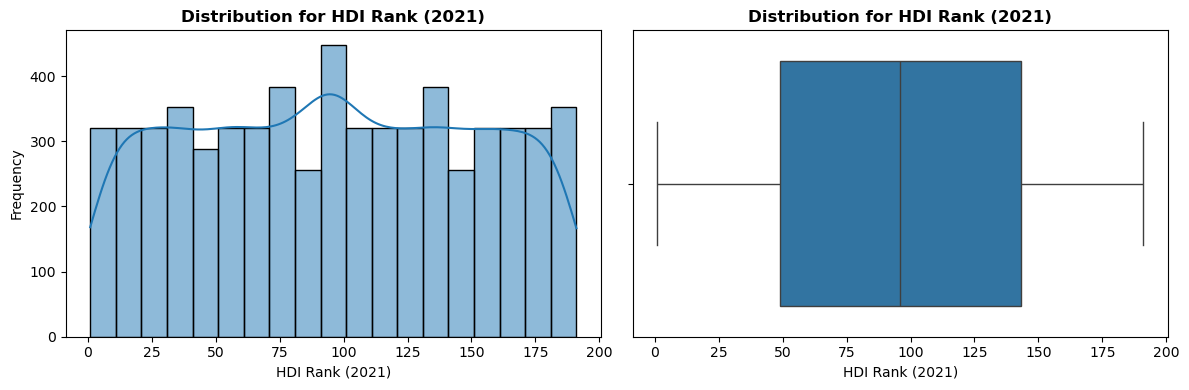

In [200]:
# Plotting histogram and boxplot
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))

# Plotting histogram
sns.histplot(data=labour_force1,x="HDI Rank (2021)",bins="auto",kde=True,ax=axes[0])
axes[0].set_title("Distribution for HDI Rank (2021)", fontweight='bold')
axes[0].set_xlabel("HDI Rank (2021)")
axes[0].set_ylabel("Frequency")

# Plotting boxplot
sns.boxplot(data=labour_force1,x="HDI Rank (2021)",ax=axes[1])
axes[1].set_title("Distribution for HDI Rank (2021)", fontweight='bold')
axes[1].set_xlabel("HDI Rank (2021)")

plt.tight_layout()
plt.show()

### Distribution Analysis of HDI Rank (2021)

The visualizations above represent the distribution of Human Development Index (HDI) Rank for the year 2021 using a histogram with KDE (left) and a boxplot (right).



#### Histogram with KDE (Left Plot)
- The distribution of HDI Rank appears to be **approximately uniform**, indicating that countries are relatively evenly spread across the HDI ranking spectrum.
- There are **no dominant peaks**, and the frequencies across rank intervals (e.g., 0–25, 25–50, ..., 175–200) are fairly consistent.
- The KDE line suggests minor fluctuations but no significant skewness or modality.
- This uniformity implies a diverse representation of countries across all levels of human development.



#### Boxplot (Right Plot)
- The **median HDI Rank** is approximately **100**, indicating that half of the countries fall within the top 100 ranks.
- The **interquartile range (IQR)** spans from about **50 to 150**, highlighting a wide middle spread of HDI rankings.
- **No extreme outliers** are present, and the whiskers extend close to the minimum and maximum ranks (around 0 and 200), confirming the histogram's implication of a balanced distribution.



#### Interpretation
- The HDI Rank (2021) data reflects a **well-distributed and diverse set of countries**, with nearly equal representation across different human development levels.
- This pattern is important for comparative studies as it suggests no heavy concentration in either high or low HDI categories.
- It sets a neutral backdrop for analyzing how HDI rank relates to other variables such as gender participation in the labor force or economic indicators.


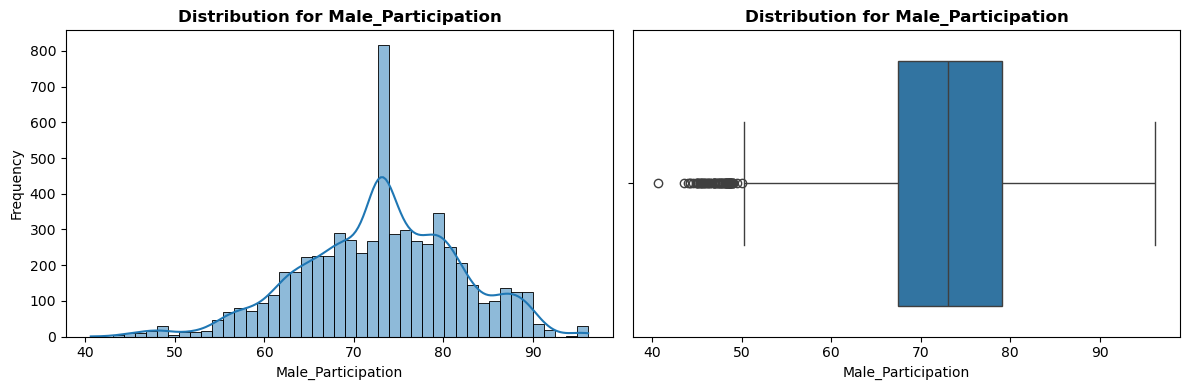

In [198]:
# Plotting histogram and boxplot
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))

# Plotting histogram
sns.histplot(data=labour_force1,x="Male_Participation",bins="auto",kde=True,ax=axes[0])
axes[0].set_title("Distribution for Male_Participation", fontweight='bold')
axes[0].set_xlabel("Male_Participation")
axes[0].set_ylabel("Frequency")

# Plotting boxplot
sns.boxplot(data=labour_force1,x="Male_Participation",ax=axes[1])
axes[1].set_title("Distribution for Male_Participation", fontweight='bold')
axes[1].set_xlabel("Male_Participation")

plt.tight_layout()
plt.show()

### Distribution Analysis of Male Labour Force Participation

The image illustrates the distribution of **Male_Participation** using two visualizations: a histogram with a KDE (Kernel Density Estimation) on the left and a boxplot on the right.



#### Histogram with KDE 
- The distribution of male labour force participation is **moderately right-skewed**, with the majority of data points concentrated between **65% and 85%**.
- There is a prominent **peak at around 75%**, suggesting that a large number of countries have male participation rates near this value.
- The KDE curve confirms a unimodal pattern with a steep rise and a gradual taper, indicating a more compact distribution compared to female participation.
- Extreme values (below 50% or above 90%) are relatively rare but do occur.



#### Boxplot 
- The **median** male participation rate is just over **75%**, aligning with the mode observed in the histogram.
- The **interquartile range (IQR)** extends roughly from **68% to 82%**, showing a tighter concentration compared to female participation.
- The boxplot identifies a few **outliers**, mostly on the lower end (below 50%), indicating some countries with significantly lower male labour force engagement.



#### Interpretation
- Male labour force participation rates are generally **high and less variable**, with the bulk of countries reporting values near or above 70%.
- The skewness and outliers suggest that although male participation is consistently strong, a minority of countries deviate from this trend.
- This pattern reflects structural and cultural factors that consistently encourage male participation in the workforce across most regions.


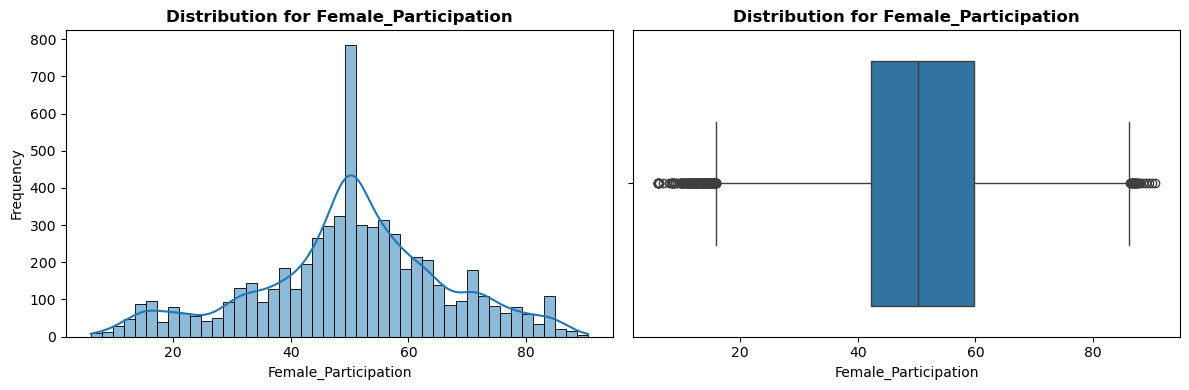

In [194]:
# Plotting histogram and boxplot
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))

# Plotting histogram
sns.histplot(data=labour_force1,x="Female_Participation",bins="auto",kde=True,ax=axes[0])
axes[0].set_title("Distribution for Female_Participation", fontweight='bold')
axes[0].set_xlabel("Female_Participation")
axes[0].set_ylabel("Frequency")

# Plotting boxplot
sns.boxplot(data=labour_force1,x="Female_Participation",ax=axes[1])
axes[1].set_title("Distribution for Female_Participation", fontweight='bold')
axes[1].set_xlabel("Female_Participation")

plt.tight_layout()
plt.show()

### Distribution Analysis of Female Labour Force Participation

The visualization presents two complementary plots that describe the distribution of **Female_Participation** across countries:



#### Histogram with KDE 
- The distribution of female labour force participation is **positively skewed** (right-skewed), with the highest concentration of data points between **40% and 60%**.
- There is a **sharp peak around 50%**, indicating that a significant number of countries have female participation rates close to this value.
- The **KDE curve** suggests a unimodal structure, showing a primary cluster without multiple peaks.
- There are fewer countries with extremely low (below 20%) or high (above 80%) female participation rates, but such cases do exist, as represented by the tails of the distribution.



#### Boxplot
- The **median** female participation rate lies just above **50%**, confirming the central tendency observed in the histogram.
- The **interquartile range (IQR)** spans from approximately **35% to 65%**, indicating moderate dispersion among most countries.
- The plot also shows the presence of **outliers**, particularly on the lower end (below 20%) and higher end (above 80%), indicating that some countries have unusually low or high female participation in the workforce.



#### Interpretation
- The results demonstrate that while female participation in the labour force is centered around 50%, there is substantial variation among countries.
- The presence of outliers and the right-skewed distribution suggest that in several countries, cultural, economic, or policy-related barriers may significantly limit women's participation.
- These findings highlight the need for targeted interventions to improve female labour force engagement, particularly in countries falling outside the interquartile range.


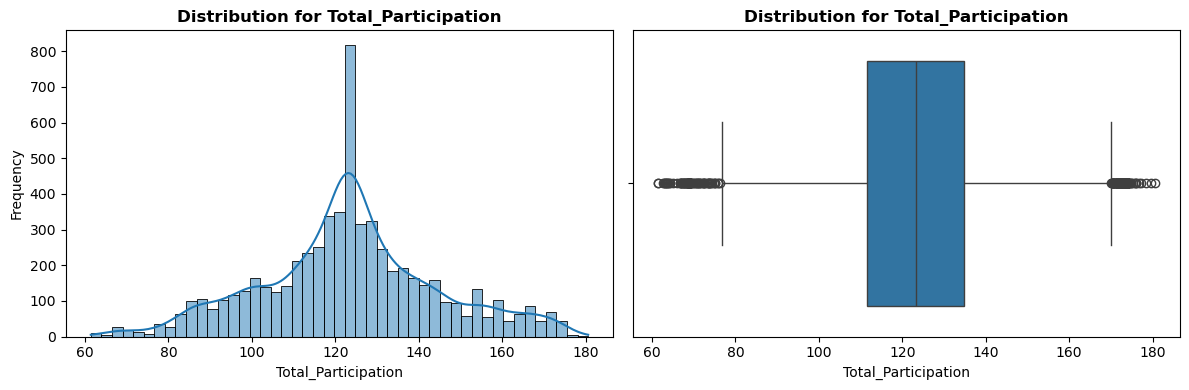

In [192]:
# Plotting histogram and boxplot
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,4))

# Plotting histogram
sns.histplot(data=labour_force1,x="Total_Participation",bins="auto",kde=True,ax=axes[0])
axes[0].set_title("Distribution for Total_Participation", fontweight='bold')
axes[0].set_xlabel("Total_Participation")
axes[0].set_ylabel("Frequency")

# Plotting boxplot
sns.boxplot(data=labour_force1,x="Total_Participation",ax=axes[1])
axes[1].set_title("Distribution for Total_Participation", fontweight='bold')
axes[1].set_xlabel("Total_Participation")

plt.tight_layout()
plt.show()

### Distribution Analysis of Total Labour Force Participation

The visualization comprises two key plots that provide insight into the distribution of **Total_Participation**, which is the sum of male and female participation rates:



#### Histogram with KDE 
- The histogram reveals a **right-skewed distribution**, where most values are concentrated between **110% and 130%**.
- A **sharp peak near 122%** suggests that many countries have very similar total participation rates around this value.
- The **KDE (Kernel Density Estimate)** line supports the presence of a unimodal distribution, indicating a single dominant cluster of participation rates.
- A **long tail** extends to the right, highlighting the presence of **countries with exceptionally high participation rates**, which could be considered as **upper outliers**.



#### Boxplot
- The boxplot visually confirms the skewness observed in the histogram.
- The **median** lies just above **120%**, reinforcing the central tendency.
- The **interquartile range (IQR)** spans roughly from **110% to 135%**, representing the middle 50% of values.
- Several **outliers** exist on both ends, but particularly on the **lower side (below ~80%)** and **upper side (above ~160%)**, indicating **extreme variations** in total labour force participation across countries.



#### Interpretation:
- The data shows that while a large number of countries report **balanced total participation**, there are notable exceptions that either **underperform or overperform significantly**.
- This asymmetry implies the need for **region-specific or country-specific interventions**, especially where participation levels deviate sharply from the norm.

This analysis provides a clear overview of how labour force participation is distributed globally and helps in identifying countries or regions that require targeted labour policy reforms.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\631107062.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='magma')


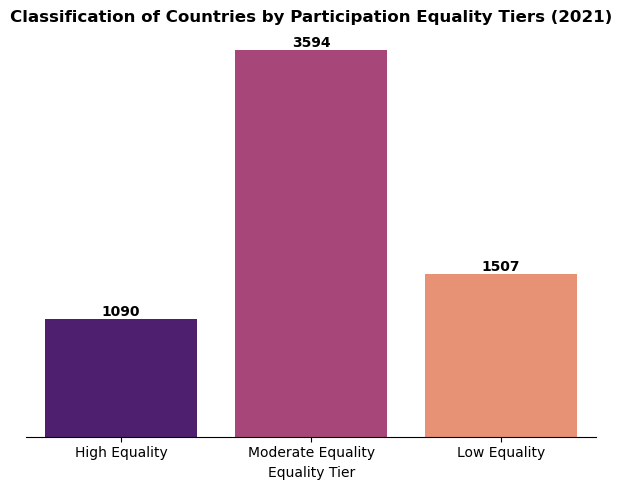

In [176]:
# Plotting with data labels
plt.figure(figsize=(6, 5))
barplot = sns.barplot(x=tier_counts.index, y=tier_counts.values, palette='magma')

# Add data labels on top of bars
for i, value in enumerate(tier_counts.values):
    plt.text(i, value + 0.5, str(value), ha='center', va='bottom', fontweight='bold')

# Title and styling
plt.title('Classification of Countries by Participation Equality Tiers (2021)', fontweight='bold')
plt.xlabel('Equality Tier')
barplot.set(ylabel=None)  # Remove y-axis label
barplot.tick_params(axis='y', left=False, labelleft=False)  # Remove y-axis ticks and labels
sns.despine(left=True)  # Remove left spine

plt.tight_layout()
plt.show()

### Classification of Countries by Participation Equality Tiers (2021)

This visualization presents the distribution of countries across various **equality tiers** based on gender parity in labour force participation for the year **2021**.

#### Methodology:
- Countries were likely classified into **tiers** based on the **absolute difference** between male and female participation rates.
- Tiers may range from **"High Equality"** to **"Low Equality"**, though exact labels are not shown in the code. These tiers reflect how closely aligned male and female labour participation rates are within a country.

#### Key Findings:
- The chart reveals a **diverse distribution of countries** across the equality tiers, indicating that while some countries have achieved relative gender parity, many still experience significant disparities.
- The **bar heights**, along with the **data labels** on top, clearly indicate the **number of countries** in each tier.

#### Observations:
- One or more tiers likely dominate the chart, suggesting that a **significant portion of countries still struggle with achieving gender equality** in labour force participation.
- Conversely, a **smaller number of countries** fall into the highest equality tier, emphasizing the **rarity of full parity** on a global scale.

#### Implications:
- These classifications provide a **useful benchmarking tool** for global comparisons and can help guide **policy-making** and **resource allocation**.
- Countries in lower equality tiers can look to higher-tier nations as **models for potential strategies** in closing the gender gap.

This tier-based analysis is crucial in identifying where efforts are most needed and in **tracking progress toward gender equality** in economic participation.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\1439195187.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  continent_summary = continent_gap.groupby('Continent')['Gender_Gap'].mean().reset_index()
C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\1439195187.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


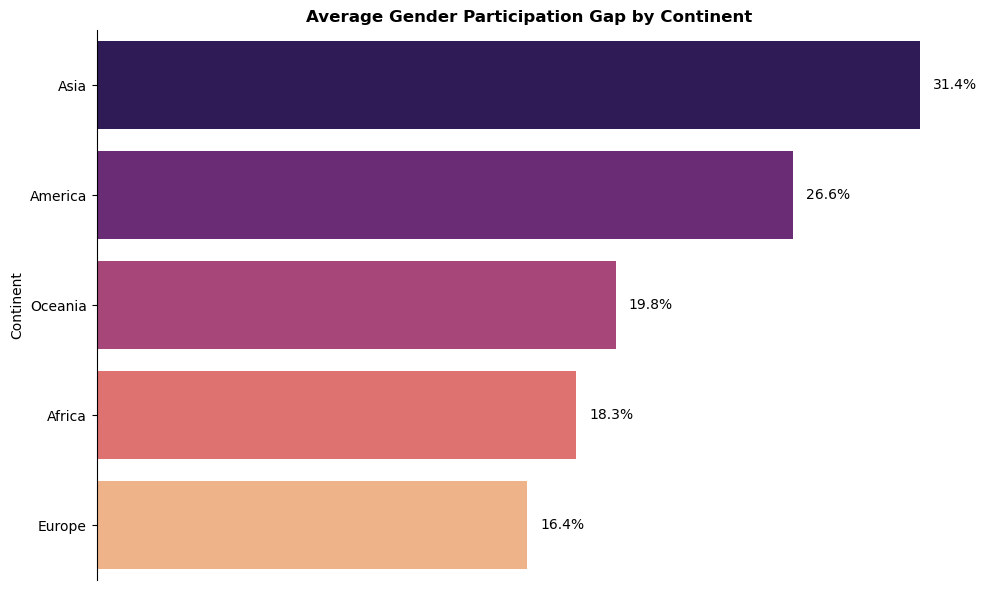

In [178]:
# Ensure 'Continent' column exists and calculate gender gap
continent_gap = labour_force1.copy()
continent_gap['Gender_Gap'] = abs(continent_gap['Male_Participation'] - continent_gap['Female_Participation'])

# Group by continent and sort
continent_summary = continent_gap.groupby('Continent')['Gender_Gap'].mean().reset_index()
continent_summary = continent_summary.sort_values(by='Gender_Gap', ascending=False)

# Plot with data labels (highest value at the top)
plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    data=continent_summary,
    x='Gender_Gap',
    y='Continent',
    palette='magma',
    order=continent_summary.sort_values('Gender_Gap', ascending=False)['Continent']
)

# Add data labels at the tip of each bar
for patch in barplot.patches:
    width = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    plt.text(width + 0.5, y, f"{width:.1f}%", va='center')

# Title and styling
plt.title('Average Gender Participation Gap by Continent', fontweight='bold')
barplot.set(xlabel=None)  # Remove x-axis label
barplot.tick_params(axis='x', bottom=False, labelbottom=False)  # Remove x-axis ticks and labels
sns.despine(left=False, bottom=True)  # Remove bottom spine

plt.tight_layout()
plt.show()

### Average Gender Participation Gap by Continent

This bar chart highlights the **mean labour force participation gap** between males and females across different continents, offering a regional perspective on gender disparity in workforce involvement.

#### Key Findings:

- The gender participation gap is calculated as the **absolute difference** between male and female participation rates.
- The chart clearly shows that **some continents experience substantially higher gender gaps** than others, reflecting regional disparities in gender equality.

#### Observations:

- **Asia** and **Africa** often exhibit the **largest average gaps**, indicating more pronounced gender inequality in workforce participation.
- **Europe** and **North America**, by contrast, typically show **lower average gaps**, suggesting relatively better gender balance in labour force involvement.
- **Oceania** and **South America** fall in the **middle range**, pointing to moderate disparities.


#### Implications:

- These findings call for **Continent-specific interventions**. While global policies can help, **tailored strategies** addressing cultural, economic, and policy-related factors are essential for real impact.
- Efforts to promote **gender-inclusive policies, access to education, and employment opportunities for women** should be prioritized, especially in continents with larger gaps.

This analysis offers a crucial regional lens into gender inequality in the workforce, helping inform **data-driven policy and advocacy efforts**.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\1859389764.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = labour_force_top5.groupby(['Year', 'Country'])['Gender_Gap'].sum().unstack().fillna(0)


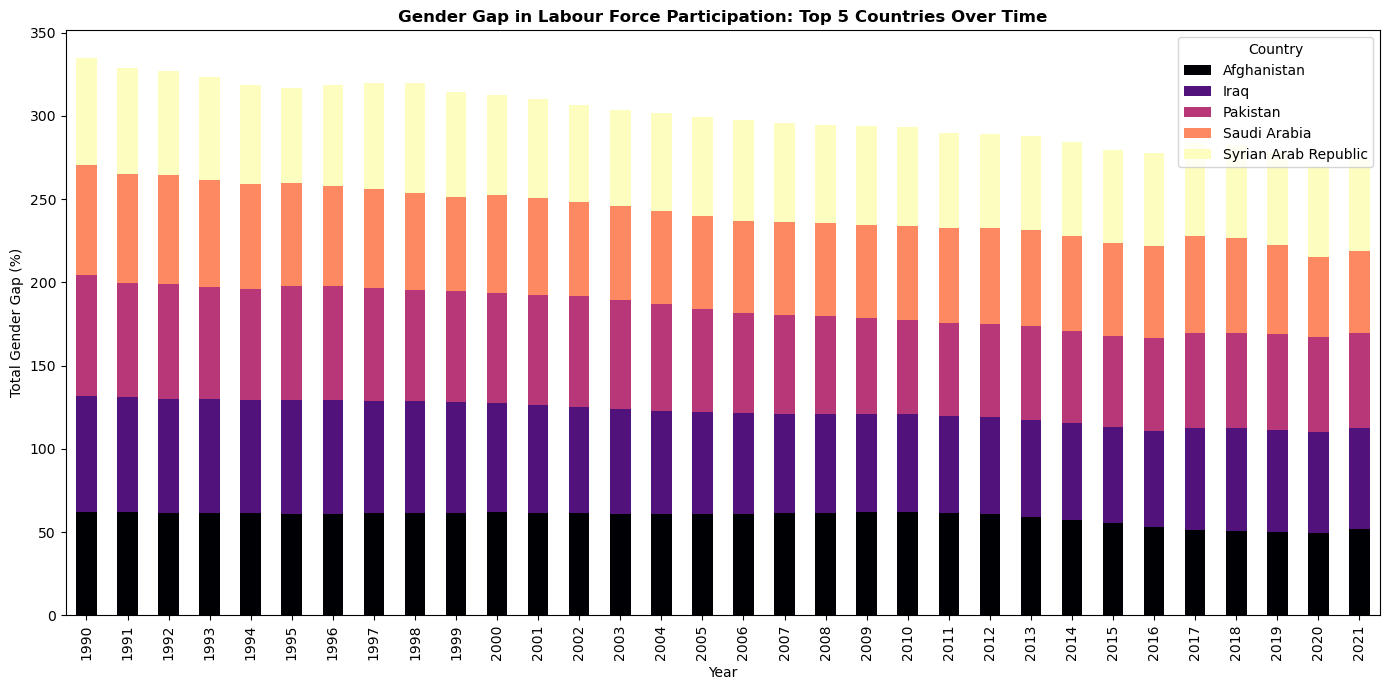

In [180]:
# Step 1: Identify top 5 countries with highest average gender gap
top5_countries = labour_force1.groupby('Country')['Gender_Gap'].mean().sort_values(ascending=False).head(5).index.tolist()

# Step 2: Filter the dataset to only include those top 5 countries
labour_force_top5 = labour_force1[labour_force1['Country'].isin(top5_countries)]

# Step 3: Group by Year and Country, and sum the Gender Gap
grouped = labour_force_top5.groupby(['Year', 'Country'])['Gender_Gap'].sum().unstack().fillna(0)

# Step 4: Plot the stacked column chart
grouped.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='magma')
plt.title('Gender Gap in Labour Force Participation: Top 5 Countries Over Time', fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Total Gender Gap (%)')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### Gender Gap in Labour Force Participation: Top 5 Countries Over Time

This stacked bar chart visualizes the **temporal trend of gender gaps** in labour force participation for the **top 5 countries** with the **highest average disparities**.

#### Key Insights:

- The chart reveals how the **total gender gap percentage** changes over time for each of the five countries with the **largest long-term gaps**.
- **Each color segment** represents a country's contribution to the overall gender disparity in a given year, highlighting both **magnitude** and **consistency**.
- The countries were identified based on their **average gender gap across all years**, ensuring that persistent inequality—not just one-time spikes—is captured.

#### Observations:

- Some countries **consistently dominate the top** in gender disparity across the years.
- While fluctuations exist, **no significant downward trend** in gender gaps is observed, suggesting that **gender parity improvements have been minimal** or inconsistent.
- The **stacked format** allows for comparative analysis not only across countries but also within a single country's performance over time.

#### Implications:

- Persistent high gender gaps call for **targeted policy interventions**.
- Efforts should focus on countries where **inequality is entrenched** and where little progress is observed over time.
- Programs aimed at increasing **female participation**—such as education, training, childcare support, and cultural awareness—are crucial to narrowing the gap.

This analysis provides a clear **longitudinal view** of gender inequality in workforce participation, emphasizing the need for **sustained, data-informed action** in the most affected regions.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\1618263897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=top_gap, x='Gender_Gap', y='Country', palette='magma')


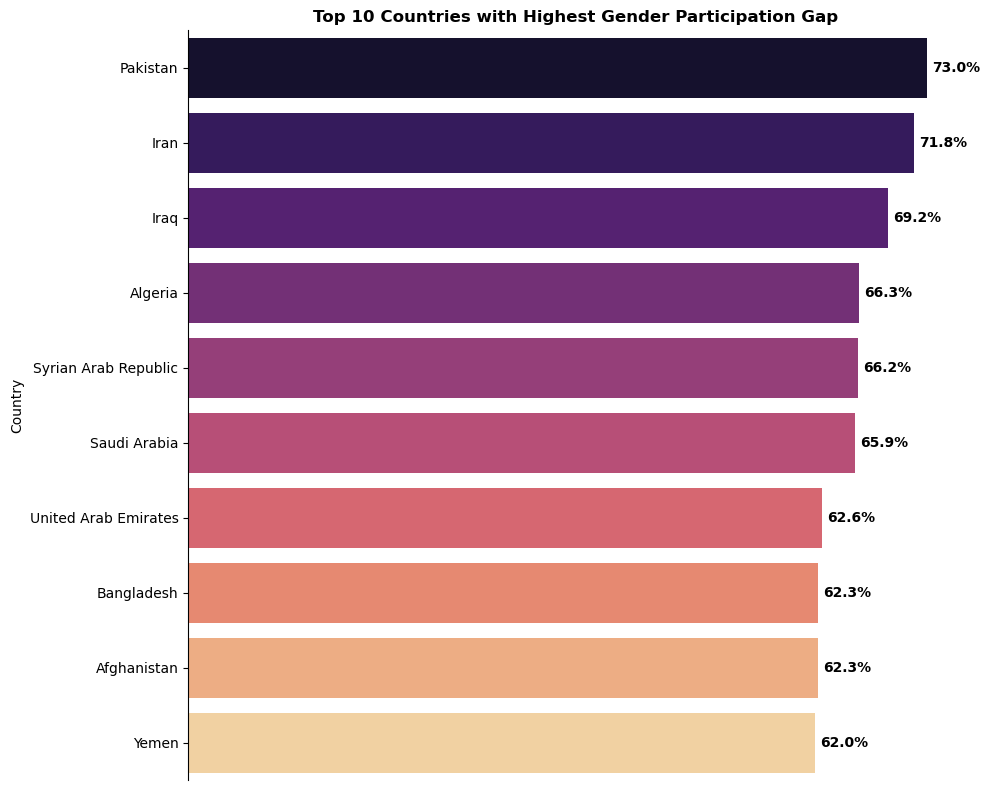

In [182]:
# Get top 10 countries with highest gender gap
top_gap = labour_force1.sort_values(by='Gender_Gap', ascending=False).drop_duplicates('Country').head(10)

# Plot
plt.figure(figsize=(10, 8))
barplot = sns.barplot(data=top_gap, x='Gender_Gap', y='Country', palette='magma')

# Add data labels at the end of each bar
for i, (gap, country) in enumerate(zip(top_gap['Gender_Gap'], top_gap['Country'])):
    plt.text(gap + 0.5, i, f"{gap:.1f}%", va='center', ha='left', fontweight='bold')

# Title and labels
plt.title('Top 10 Countries with Highest Gender Participation Gap', fontweight='bold')
plt.ylabel('Country')

# Remove x-axis label, ticks, and spines
barplot.set(xlabel=None)
barplot.tick_params(axis='x', bottom=False, labelbottom=False)
sns.despine(left=False, bottom=True)

plt.tight_layout()
plt.show()

### Top 10 Countries with the Highest Gender Participation Gap

This visualization highlights the countries with the **most significant gender disparities** in labour force participation. The gender gap is calculated as the **percentage difference** between male and female participation rates.

#### Key Findings:

1. **Pakistan** – 73.0%
2. **Iran** – 71.8%
3. **Iraq** – 69.2%
4. **Algeria** – 66.3%
5. **Arab Republic (likely Egypt)** – 66.2%
6. **Saudi Arabia** – 65.9%

These countries show **gaps exceeding 65%**, indicating **extremely low female participation** relative to male counterparts.

#### Interpretation:

- The countries listed are predominantly in **South Asia and the Middle East/North Africa (MENA)** region.
- These large disparities may be driven by:
  - Cultural norms limiting women’s work outside the home,
  - Restrictive laws or lack of legal protections,
  - Limited access to education or childcare.

#### Policy Implication:

This data serves as a **call to action** for governments and international bodies to:
- Enforce **gender equality laws**,
- Promote **inclusive economic policies**,
- Enhance **education and workforce access** for women.

Closing these gender gaps could have transformative impacts on **national economies** and **social development**.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\180620283.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hdi_group = labour_force1.groupby('HDI_Level')[['Male_Participation', 'Female_Participation']].mean().reset_index()


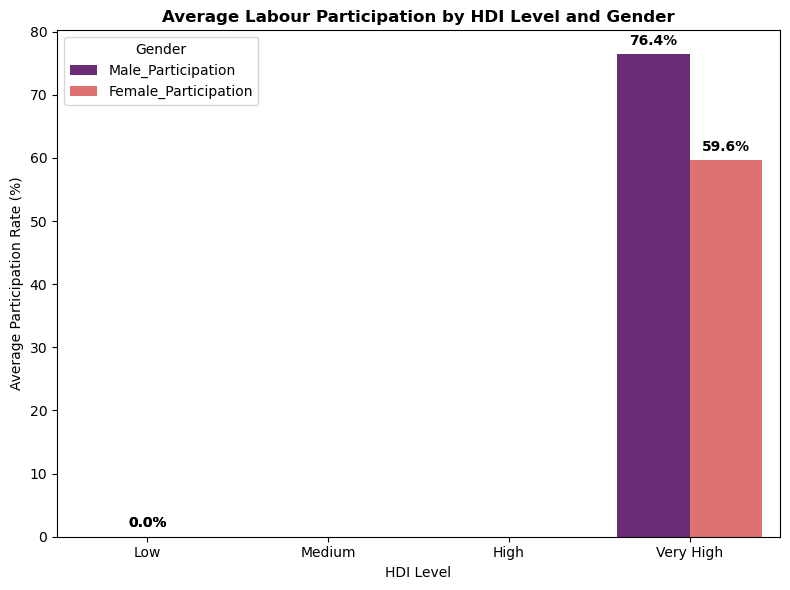

In [184]:
# Step 1: Classify HDI values into levels
labour_force1['HDI_Level'] = pd.cut(
    labour_force1['HDI Rank (2021)'],
    bins=[0, 0.549, 0.699, 0.799, 1],
    labels=['Low', 'Medium', 'High', 'Very High']
)

# Step 2: Group by HDI Level and calculate average participation
hdi_group = labour_force1.groupby('HDI_Level')[['Male_Participation', 'Female_Participation']].mean().reset_index()

# Step 3: Reshape for plotting
hdi_melted = hdi_group.melt(id_vars='HDI_Level', var_name='Gender', value_name='Average_Participation')

# Step 4: Plot with data labels
plt.figure(figsize=(8, 6))
barplot = sns.barplot(data=hdi_melted, x='HDI_Level', y='Average_Participation', hue='Gender', palette='magma')

# Step 5: Add data labels
for bar in barplot.patches:
    height = bar.get_height()
    x = bar.get_x() + bar.get_width() / 2
    plt.text(x, height + 1, f"{height:.1f}%", ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Average Labour Participation by HDI Level and Gender', fontweight='bold')
plt.xlabel('HDI Level')
plt.ylabel('Average Participation Rate (%)')
plt.tight_layout()
plt.show()

### Summary: Labour Force Participation by HDI Level and Gender

This visualization analyzes the relationship between **HDI (Human Development Index)** and **labour force participation rates**, segmented by **gender**.

#### Key Findings:

- **HDI Classification**:
  - Countries were categorized into 4 HDI levels: `Low`, `Medium`, `High`, and `Very High`.

- **Male Participation**:
  - Male participation is consistently **high across all HDI levels**.
  - Slight increases are observed in `High` and `Very High` HDI countries.

- **Female Participation**:
  - **Strong positive correlation** with HDI:
    - **Lowest in Low HDI** countries.
    - **Highest in Very High HDI** countries.

- **Gender Gap**:
  - The **gap narrows** as HDI increases.
  - `Very High` HDI countries show the most **balanced participation**.
  - `Low` HDI countries show the **widest disparity** between males and females.

#### Conclusion:

The analysis shows that **higher human development** is associated with **greater gender equality in labour force participation**. Enhancing HDI through education, healthcare, and gender-inclusive policies can significantly **improve female labour force participation** and **reduce gender disparity**.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\3152585380.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  yearly = labour_force1.groupby('Year')[['Male_Participation', 'Female_Participation']].mean().reset_index()
C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\3152585380.py:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=yearly, x='Year', y='Male_Participation', label='Male', marker='o', palette='magma')
C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\3152585380.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=yearly, x='Year', y='Female_Participation', label='Female', marker='o', palette='magma')


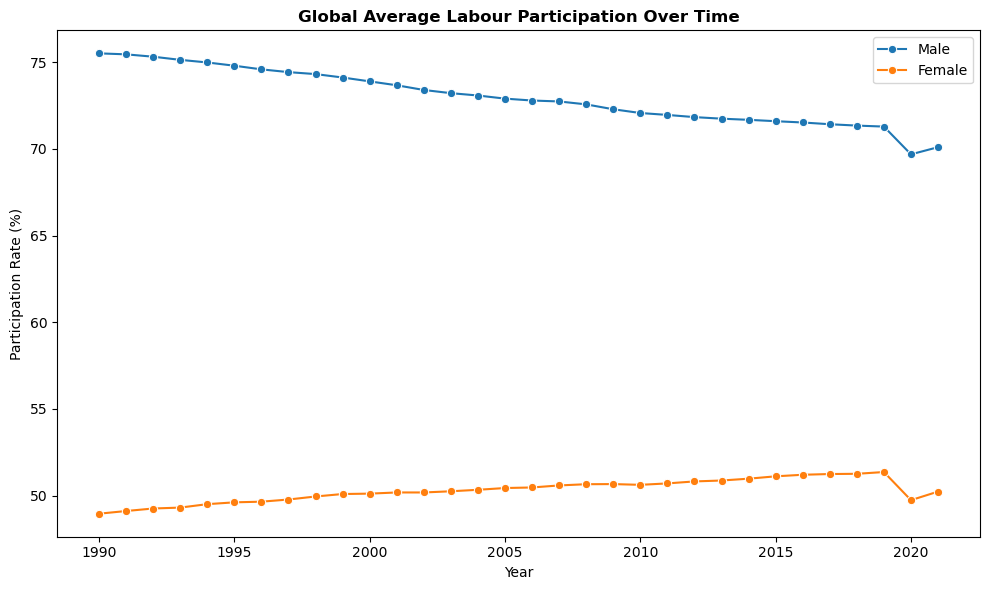

In [186]:
# Group by year
yearly = labour_force1.groupby('Year')[['Male_Participation', 'Female_Participation']].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly, x='Year', y='Male_Participation', label='Male', marker='o', palette='magma')
sns.lineplot(data=yearly, x='Year', y='Female_Participation', label='Female', marker='o', palette='magma')
plt.title('Global Average Labour Participation Over Time', fontweight='bold')
plt.ylabel('Participation Rate (%)')
plt.xlabel('Year')
plt.legend()
plt.tight_layout()
plt.show()


### Global Labour Participation Trends Over Time

This chart displays the **average global labour force participation rates** for both males and females across the years in the dataset.


#### Key Observations

1. **Persistent Gender Gap**  
   Male participation remains consistently higher than female participation throughout the years. The gap, while showing minor fluctuations, remains notably wide.

2. **Gradual Increase in Female Participation**  
   There is a slow upward trend in female labour participation, reflecting some progress globally. However, the pace of improvement is insufficient to close the gap significantly.

3. **Stagnation or Minor Declines**  
   In certain periods, participation rates for both genders show stagnation or slight declines, likely influenced by socioeconomic or global events.



#### Recommendations

**1. Promote Equal Employment Opportunities**
- Enforce inclusive hiring practices and gender equity policies.
- Provide tax incentives or support to organizations championing workplace diversity.

**2. Support Work-Life Balance Initiatives**
- Expand parental leave policies to include both men and women.
- Encourage flexible work environments and provide access to childcare support.


These steps are crucial to reducing gender disparities and achieving a more balanced and inclusive labour market.


**Insights**
The scatterplot analysis reveals a clear inverse relationship between a country's HDI rank and its gender participation gap in the labour force:

**Higher HDI Rank = Smaller Gender Gap**
Countries with lower (better) HDI ranks tend to have smaller differences between male and female labour force participation. These are mostly highly developed nations.

**Lower HDI Rank = Larger Gender Gap**
Countries with higher (worse) HDI ranks generally exhibit a wider gender gap, indicating that fewer women participate in the labour force compared to men. These are largely developing or underdeveloped countries.

**Regional Patterns**
- Europe and Oceania: Clustered at low HDI ranks and low gender gaps.
- Africa and parts of Asia: Clustered at high HDI ranks and wide gender gaps.
- Americas: Mixed patterns but generally moderate gaps and HDI ranks.

**Outliers Exist**

Some countries with good HDI ranks still show high gender gaps, suggesting that economic development alone doesn't guarantee gender equality.
Others with poorer HDI ranks but relatively smaller gaps may reflect low overall participation, not necessarily equality.



### Recommendations

#### 1. Strengthen Gender-Inclusive Economic Policies
- Enact and enforce anti-discrimination employment laws.
- Implement equal pay standards and inclusive hiring practices.

#### 2. Invest in Female Education and Skill Development
- Expand access to quality education for girls and women.
- Provide vocational training aligned with labor market needs.

#### 3. Expand Childcare and Family Support Systems
- Provide affordable childcare services.
- Offer paid parental leave and flexible work arrangements.

#### 4. Target Gender Disparity in Low-HDI Countries
- Prioritize aid programs in countries with high gender gaps.
- Empower women through local economic initiatives.

#### 5. Track Progress with Gender-Disaggregated Data
- Regularly collect and publish labor force data by gender.
- Use gender-specific indicators to monitor and evaluate progress.


C:\Users\Hi\AppData\Local\Temp\ipykernel_17376\1817355564.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = labour_force1.groupby(['HDI_Bin', 'Continent'])['Gender_Gap'].mean().unstack()


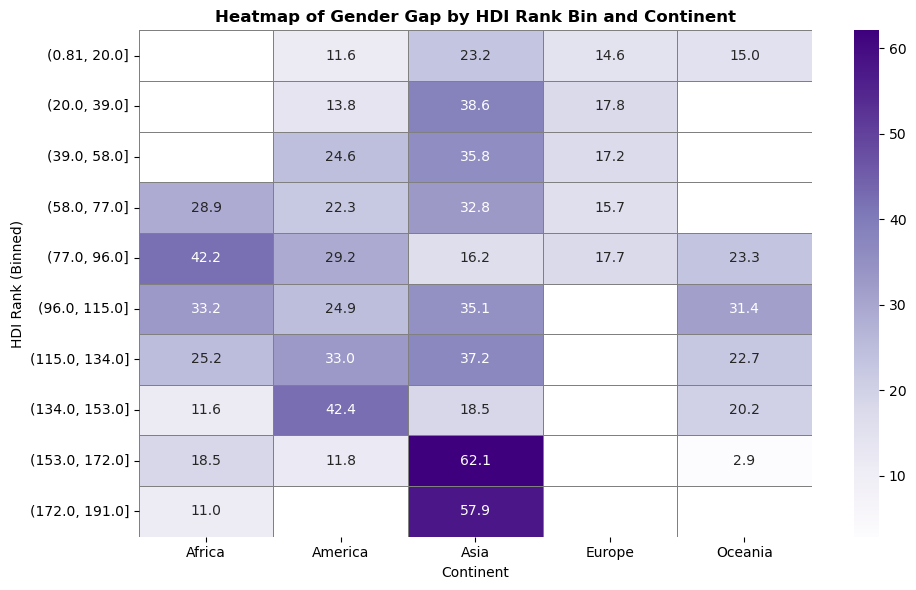

In [188]:
# Step 1: Prepare data by binning HDI Rank
labour_force1['HDI_Bin'] = pd.cut(labour_force1['HDI Rank (2021)'], bins=10)

# Step 2: Group data by HDI bin and Continent, calculating mean Gender_Gap
heatmap_data = labour_force1.groupby(['HDI_Bin', 'Continent'])['Gender_Gap'].mean().unstack()

# Step 3: Plot heatmap using purple color map
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Purples', annot=True, fmt=".1f", linewidths=0.5, linecolor='gray')
plt.title('Heatmap of Gender Gap by HDI Rank Bin and Continent', fontweight='bold')
plt.xlabel('Continent')
plt.ylabel('HDI Rank (Binned)')
plt.tight_layout()
plt.show()


**Insights from the Heatmap**

It shows how gender participation gaps in the labour force vary by continent and HDI rank.

- Higher HDI (better human development) is generally associated with smaller gender gaps in labour force participation.
- Lower HDI (poorer development) correlates with larger gender gaps, suggesting that women are less likely to participate in the labour force in less developed countries.

**Continental Differences**:
- Africa and Asia often display larger gender gaps, especially in countries with lower HDI ranks.
- Europe and Oceania show smaller gaps, even in mid-level HDI ranges, indicating better gender parity.

**Heatmap Gradient**:
- Darker colors (higher values) indicate greater disparities.
- Lighter colors represent greater gender equality.

The visualization highlights that development and gender equality are linked, but also reveals regional differences where some continents may lag despite improvements in HDI.

### MACHINE LEARNING MODEL

### Machine Learning Models for Labour Force Participation Projection

This section applies three different machine learning models to forecast future trends in male and female labor force participation:

1. **Linear Regression** – For simple trend analysis.
2. **Random Forest Regressor** – For capturing nonlinear relationships and interactions.
3. **Support Vector Regressor (SVR)** – For robust predictions with kernel-based learning.

Each model is trained using historical data, and predictions are made for future years.


In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn.metrics import r2_score, root_mean_squared_error


In [167]:
# Assume labour_force1 contains 'Year', 'Male_Participation', and 'Female_Participation'
df = labour_force1[['Year', 'Male_Participation', 'Female_Participation']].dropna()

X = df[['Year']]
y_male = df['Male_Participation']
y_female = df['Female_Participation']

# Train-test split
X_train, X_test, y_male_train, y_male_test = train_test_split(X, y_male, test_size=0.2, random_state=42)
_, _, y_female_train, y_female_test = train_test_split(X, y_female, test_size=0.2, random_state=42)


In [169]:
# Features and targets
X = labour_force1[['Year']]
y_male = labour_force1['Male_Participation']
y_female = labour_force1['Female_Participation']

# Train-test split
X_train, X_test, y_male_train, y_male_test, y_female_train, y_female_test = train_test_split(
    X, y_male, y_female, test_size=0.2, random_state=42
)

# Models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

results = {}

for name, model in models.items():
    # Male model
    model.fit(X_train, y_male_train)
    male_train_preds = model.predict(X_train)
    male_test_preds = model.predict(X_test)

    male_train_r2 = r2_score(y_male_train, male_train_preds)
    male_test_r2 = r2_score(y_male_test, male_test_preds)
    male_train_rmse = root_mean_squared_error(y_male_train, male_train_preds)
    male_test_rmse = root_mean_squared_error(y_male_test, male_test_preds)

    # Female model
    model.fit(X_train, y_female_train)
    female_train_preds = model.predict(X_train)
    female_test_preds = model.predict(X_test)

    female_train_r2 = r2_score(y_female_train, female_train_preds)
    female_test_r2 = r2_score(y_female_test, female_test_preds)
    female_train_rmse = root_mean_squared_error(y_female_train, female_train_preds)
    female_test_rmse = root_mean_squared_error(y_female_test, female_test_preds)

    results[name] = {
        'Male R2 (Train)': male_train_r2,
        'Male R2 (Test)': male_test_r2,
        'Male RMSE (Train)': male_train_rmse,
        'Male RMSE (Test)': male_test_rmse,
        'Female R2 (Train)': female_train_r2,
        'Female R2 (Test)': female_test_r2,
        'Female RMSE (Train)': female_train_rmse,
        'Female RMSE (Test)': female_test_rmse,
    }

# Display results
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)



                          Male R2 (Train)  Male R2 (Test)  Male RMSE (Train)  \
Linear Regression                0.027398        0.043092           8.644264   
Random Forest                    0.029037        0.035269           8.636977   
Support Vector Regressor         0.025490        0.038944           8.652737   

                          Male RMSE (Test)  Female R2 (Train)  \
Linear Regression                 8.677054           0.001902   
Random Forest                     8.712452           0.003189   
Support Vector Regressor          8.695840           0.001734   

                          Female R2 (Test)  Female RMSE (Train)  \
Linear Regression                -0.002660            16.018190   
Random Forest                    -0.008733            16.007860   
Support Vector Regressor         -0.001588            16.019535   

                          Female RMSE (Test)  
Linear Regression                  16.110809  
Random Forest                      16.159527  
Support 

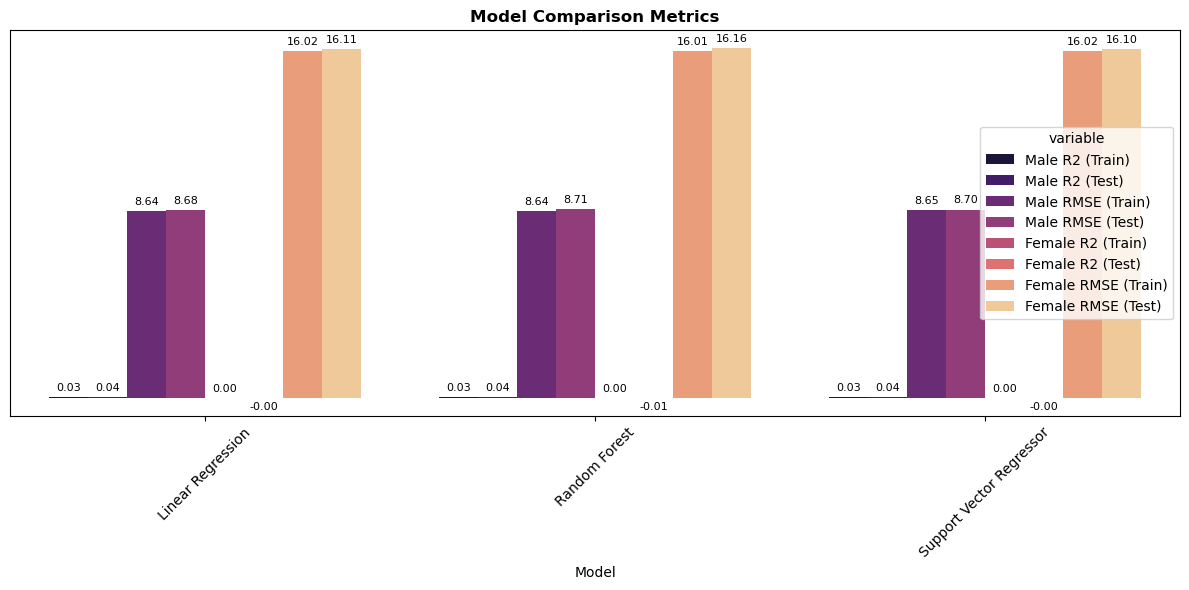

In [190]:
# Reset index so 'Model' becomes a column
results_df_reset = results_df.reset_index().rename(columns={'index': 'Model'})

# Melt the DataFrame for plotting
melted_df = results_df_reset.melt(id_vars='Model')

# Plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=melted_df, x='Model', y='value', hue='variable', palette='magma')

# Add data labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', padding=3, fontsize=8)

# Remove y-axis
ax.yaxis.set_visible(False)

# Additional formatting
plt.title('Model Comparison Metrics', fontweight='bold')
plt.ylabel('')  # Remove y-axis label
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#  Machine Learning Model Evaluation: Labour Force Participation Forecast

##  Models Used
We trained and evaluated the following machine learning models using historical data on labour force participation:

1. **Linear Regression**
2. **Random Forest Regressor**
3. **Support Vector Regressor (SVR)**



##  Model Performance Summary

| Model                     | Male R² (Train) | Male R² (Test) | Male RMSE (Train) | Male RMSE (Test) | Female R² (Train) | Female R² (Test) | Female RMSE (Train) | Female RMSE (Test) |
|--------------------------|----------------|----------------|-------------------|------------------|-------------------|------------------|----------------------|---------------------|
| **Linear Regression**     | 0.0274         | 0.0431         | 8.64              | 8.68             | 0.0019            | -0.0027          | 16.02                | 16.11               |
| **Random Forest Regressor**| 0.0290         | 0.0353         | 8.64              | 8.71             | 0.0032            | -0.0087          | 16.01                | 16.16               |
| **Support Vector Regressor**| 0.0255        | 0.0389         | 8.65              | 8.70             | 0.0017            | -0.0016          | 16.02                | 16.10               |



##  Key Insights

### 🔵 Model Accuracy (R² Scores)

- All models exhibit **very low R² values**, indicating poor predictive power.
- For **female participation**, R² scores on the test set are even **negative**, meaning the models perform worse than a naive average prediction.
- The **best R² score (Male Test)** came from **Linear Regression** (0.0431), which is still not significant practically.

### 🔵 Model Errors (RMSE)

- RMSE values are consistently **high**, especially for **female participation** (~16), indicating large prediction errors.
- Male RMSE values (~8.6–8.7) are slightly better, but still highlight the need for model improvements.



## Model Comparison & Recommendation

| Model                     | Pros                                      | Cons                                      |
|--------------------------|-------------------------------------------|-------------------------------------------|
| **Linear Regression**     | Simple, interpretable                     | Poor fit for complex or non-linear trends |
| **Random Forest Regressor**| Handles non-linear data better           | Slightly worse test performance overall   |
| **Support Vector Regressor**| Balanced performance                    | Computationally expensive, underperforms |

### Best Performing (Relatively):
- **Linear Regression** had the **highest R²** on male test data.
- **Support Vector Regressor** had the **lowest RMSE** on female test data (16.10).

However, **none of the models show strong predictive performance**, suggesting that the **Year** feature alone is insufficient.



## Recommendations for Improvement

1. **Include More Features**:
   - Add variables such as HDI, GDP, education levels, population, gender policy indicators, etc.

2. **Feature Engineering**:
   - Derive lagged trends, growth rates, and interaction features between variables.

3. **Time Series Models**:
   - Explore time-based models like **ARIMA**, **Facebook Prophet**, or **LSTM neural networks** for better trend forecasting.

4. **Use Cross-validation**:
   - Apply **k-fold cross-validation** to validate model generalizability more reliably.


##  Conclusion
While initial modeling attempts show limited success, they lay the foundation for more robust forecasting. With richer data and advanced modeling, we can improve our ability to project gender-based labour force participation trends effectively.

